##### 1. Matrix notation allows us to easily expand if more data points are available

For example, if we have three data points

$$(x_1, y_1)=(3,5),\, (x_2, y_2)=(4,6),\, (x_3, y_3)=(1,4)$$

We still can write the model as

$$\mathbf{y}=A\mathbf{\theta}$$

where

$$\mathbf{y}=\begin{bmatrix} 5 \\ 6 \\ 4 \end{bmatrix},\, A=\begin{bmatrix} 3 & 1 \\ 4 & 1 \\ 1 & 1\end{bmatrix},\, \mathbf{\theta}=\begin{bmatrix} a \\ b \end{bmatrix}$$

Note that first column of $A$ is $\begin{bmatrix} x_1 \\ x_2 \\ x_3 \end{bmatrix}$

##### 2. Now, since $A$ is a `non-square` matrix, we cannot directly find $A^{-1}$

$$\mathbf{\theta}=A^{-1}\mathbf{y}$$

Instead, the formula becomes

$$\mathbf{\theta}=(A^TA)^{-1}A^T\mathbf{y}$$

Where $A^T$ is `transpose` of $A$, where its rows become columns and columns become rows, for example

$$A^T=\begin{bmatrix} 3 & 4 & 1\\1 & 1 & 1 \end{bmatrix}$$

We use numpy to compute $\mathbf{\theta}$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(formatter={'float': '{: 0.4f}'.format})
plt.style.use('dark_background')

In [2]:
A = np.array([[3, 1], [4, 1], [1, 1]])
y = np.array([5, 6, 4])

We can use numpy inverse function `np.linalg.inv(A)` to compute $(A^TA)^{-1}$ directly

In [3]:
theta = np.linalg.inv(A.T@A)@A.T@y
theta

array([ 0.6429,  3.2857])

We can then plot the data points and line to see the results

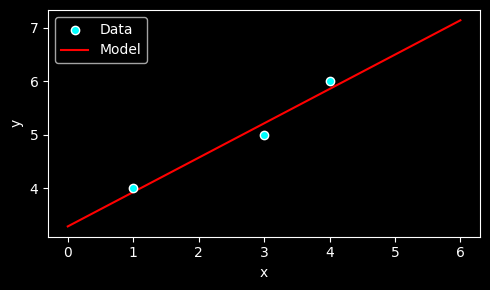

In [4]:
def prediction(x, theta):
    return theta[0]*x + theta[1]

fig, ax=plt.subplots(figsize=(5,3))

plt.scatter(A[:,0], y, color='cyan', label='Data', edgecolors='w')
ax.plot([0,6],[prediction(0, theta), prediction(6, theta)],'r-', label='Model', zorder=-5)

ax.set_xlabel('x')
ax.set_ylabel('y')
plt.tight_layout()
plt.legend()
plt.show()

We see the model no longer passes through each data points, this is normal in real world situation as each collected data points generally are affected by noise during data collection